---

#  Mplfinance Used To Plot Alfhatrend Indicator

---

### What is Alphatrend Indicator
The Alpha Trend indicator is a powerful tool that traders use to identify trends and trading points in the market. It addresses four key elements:

- Reducing false signals at sideway market by trading less frequently
- Creating a meaningful trading system by combining indicators from different categories
- Establishing reliable buy and sell points
- Identifying potential support and resistance levels

---

### mplfinance 'yahoo' styles was used to customize alphatrend indicator:
- Type of Plot Use `candle`
- Alphatrend Indicator Build With Two Types Lines Named Signal Line and Trend Line
- Background, Grid, and Figure Colors
- Grid style
- Y-Axis On The Right or Left
- Matplotlib Defaults
- Fill Between
- Alpha
- Color
#### The simplest way to do this is to choose one of the `add_plot` that come packaged with `mplfinance`
#### but, as we see below, it is also possible to customize your own `mplfinance styles`.
#### Also Other Plot Type Can Be Used

---

In [3]:
!pip install -r requirements.txt


Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


In [4]:
import pandas as pd
import pandas_ta as ta
import mplfinance as mpf
import numpy as np

In [5]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Read in daily data for the S&P 500 from November of 2019 

In [6]:
idf = pd.read_csv('../data/yahoofinance-INTC-19950101-20040412.csv',index_col=0,parse_dates=True).tail(200)

df = idf.copy()
df.index.name = 'Date'
df.shape
df.head(2)
df.tail(2)

(200, 6)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-06-25,20.530001,20.83,19.99,20.040001,13.693501,61250600
2003-06-26,20.299999,20.76,20.15,20.629999,14.096654,52904900


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-04-07,28.08,28.129999,27.480000,27.620001,18.923342,72680200
2004-04-08,28.08,28.139999,27.200001,27.370001,18.752058,71791400


---

- `alphatrend_cal` is OHLCV Data To Return Trend And Signal Line Used In Alphatrend
- **Here is Function For The Calculation:**

---

In [9]:
def alphatrend_cal(df):  
    Open = df['Open']
    Close = df['Close']
    High = df['High']
    Low = df['Low']
    Volume = df['Volume']
    ap = 14
    tr = ta.true_range(High, Low, Close)
    atr = ta.sma(tr, ap)
    noVolumeData = False
    coeff = 1
    upt = []
    downT = []
    AlphaTrend = [0.0]
    src = Close
    rsi = ta.rsi(src, 14)
    hlc3 = []
    k1 = []
    k2 = []
    mfi = ta.mfi(High, Low, Close, Volume, 14)
    for i in range(len(Close)):
        hlc3.append((High[i] + Low[i] + Close[i]) / 3)

    for i in range(len(Low)):
        if pd.isna(atr[i]):
            upt.append(0)
        else:
            upt.append(Low[i] - (atr[i] * coeff))
    for i in range(len(High)):
        if pd.isna(atr[i]):
            downT.append(0)
        else:
            downT.append(High[i] + (atr[i] * coeff))
    for i in range(1, len(Close)):
        if noVolumeData is True and rsi[i] >= 50:
            if upt[i] < AlphaTrend[i - 1]:
                AlphaTrend.append(AlphaTrend[i - 1])
            else:
                AlphaTrend.append(upt[i])

        elif noVolumeData is False and mfi[i] >= 50:
            if upt[i] < AlphaTrend[i - 1]:
                AlphaTrend.append(AlphaTrend[i - 1])
            else:
                AlphaTrend.append(upt[i])
        else:
            if downT[i] > AlphaTrend[i - 1]:
                AlphaTrend.append(AlphaTrend[i - 1])
            else:
                AlphaTrend.append(downT[i])

    for i in range(len(AlphaTrend)):
        if i < 2:
            k2.append(0)
            k1.append(AlphaTrend[i])
        else:
            k2.append(AlphaTrend[i - 2])
            k1.append(AlphaTrend[i])

    df['k1'] = k1
    df['k2'] = k2
    return df

---

- `alphatrend_cal` return new DataFrame With Two New Columns Named As `k1` and `k2`
- **Here is New Dataframe Named As alphatrend:**

---

In [10]:
alphatrend = alphatrend_cal(df).tail(90)

/home/dkrysmann/.local/lib/python3.12/site-packages/pandas_ta/volume/mfi.py:33: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1.08525583e+09 1.31405283e+09 1.07546172e+09 1.36345812e+09
 1.63441295e+09 1.28300133e+09 1.49932366e+09 1.85102292e+09
 1.08442994e+09 1.85736201e+09 2.47418707e+09 3.25021685e+09
 1.48614130e+09 1.20961167e+09 1.29078207e+09 1.12897797e+09
 1.70157436e+09 1.71547069e+09 9.93579188e+08 1.17293585e+09
 1.27994124e+09 1.29333123e+09 5.41362822e+08 1.52566836e+09
 1.47247335e+09 1.24682402e+09 3.36686446e+09 1.78532549e+09
 1.62076685e+09 1.36979005e+09 1.19353910e+09 1.68187763e+09
 1.81417418e+09 1.96576293e+09 1.51559524e+09 1.45893171e+09
 1.02205209e+09 1.39614272e+09 1.53251994e+09 1.55938475e+09
 1.26472206e+09 1.84767523e+09 1.68976992e+09 1.21475699e+09
 1.96819057e+09 8.56512535e+08 1.42375028e+09 1.22303789e+09
 2.27305524e+09 1.40175726e+09 1.28178115e+09 2.06773278e+09
 3.552589

In [11]:
# Data Extracted And New Variable Applied
k1 = alphatrend[['k1']]
k2 = alphatrend[['k2']]

Use a dict to specify other attributes (kwargs) for `fill_between`:
<br>
To demonstrate use of `fill_between` the `where` kwarg to display a holding period
<br>
`where = aplhatrend['k1'] < alphatrend['k2']`

In [12]:
fill_up = dict(y1 = alphatrend['k1'].values, y2 = alphatrend['k2'].values, where = alphatrend['k1'] >= alphatrend['k2'], color = '#00E60F')
fill_down = dict(y1 = alphatrend['k1'].values, y2 = alphatrend['k2'].values, where = alphatrend['k1'] <= alphatrend['k2'], color = '#80000B')

---

Let's say we want to plot the Ichimoku Cloud along with the basic OHLCV plot.  

We Use `make_addplot()` to create the addplot dict, and pass that into the plot() function:

We Use `Color` To Define Line Colors

We Use `alpha` To Define Depth Line Color

In [13]:
ic = [
    #Alpha Trend
    mpf.make_addplot(k1,color = '#0022FC',width=3),
    mpf.make_addplot(k2,color = '#FC0400',width=3),
]

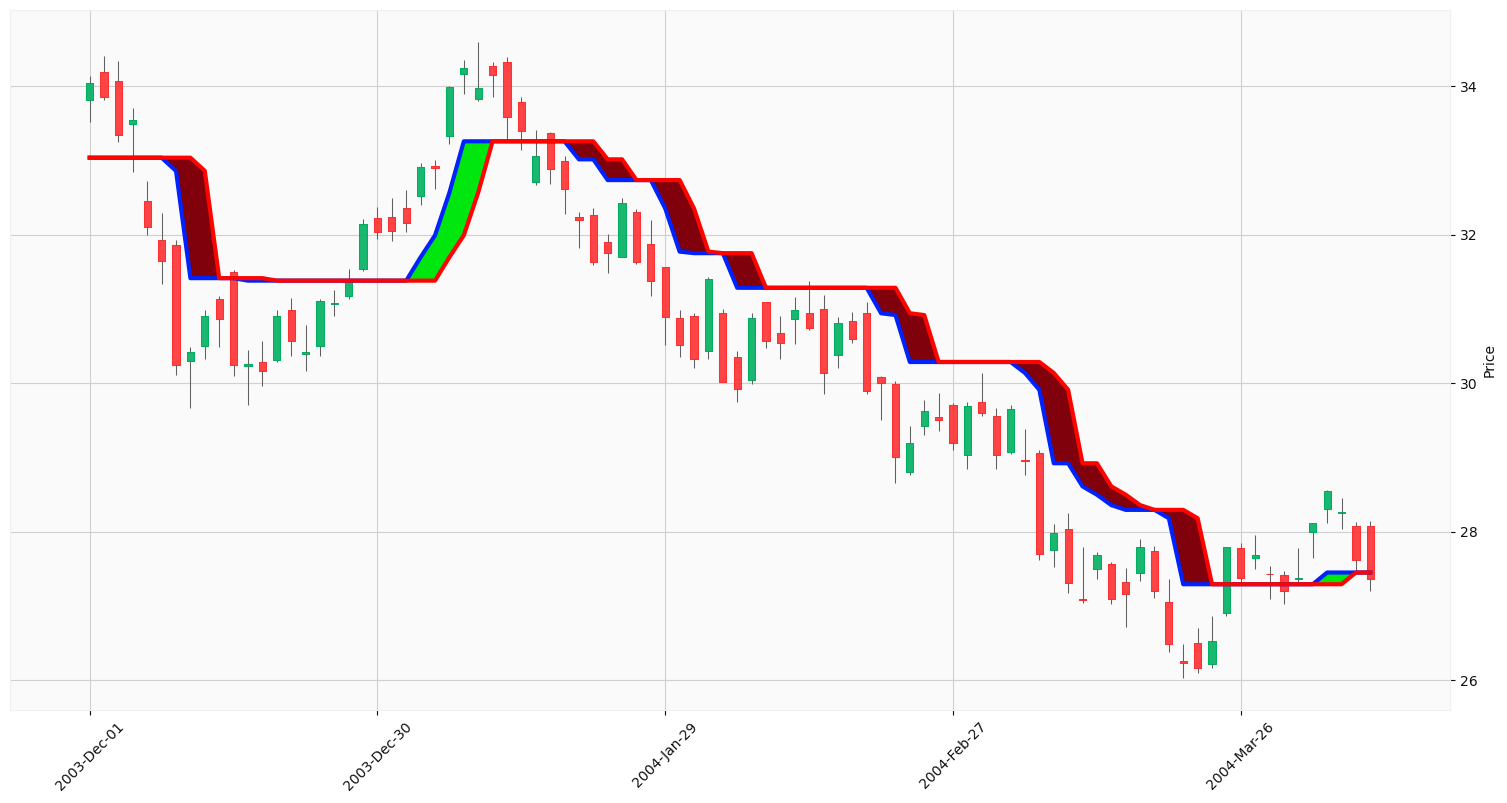

In [14]:
mpf.plot(
    df.tail(90),
    #volume=True,
    type="candle", 
    style="yahoo",
    addplot=ic,
    fill_between = [fill_up,fill_down],
    figsize=(20,10)
)